## Higher Diploma in Science in Computing (Data Analytics): Machine Learning & Statistics 

***

<div align="center"><h3> Boston House Prices Dataset (Assessment)</h3></div> 
    

    

<img src="https://i.ibb.co/ySfSKpz/boston-house-pic.jpg" alt="boston-house-pic" border="0">

***


<img src="https://image.ibb.co/gw4Gen/Index-GMIT.png" alt="Index-GMIT" border="0">


<div align="center"><h3> Gareth Duffy - g00364693 </h3></div> 

***
<div align="center"><b>Start date: 29th September 2019 - End date: 29th November 2019</div>
    
***

***
### Project objectives
***

This assessment concerns the well-known Boston House Prices dataset and the
Python packages scipy, keras, and jupyter.

- **Describe** (Descriptive statistics and plots to describe the Boston House Prices dataset). *Good summary of the dataset, repository well laid-out
and organised. Reasonable commits to the repository*. **20%**

- **Infer** (Add a section where you use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. Explain and discuss your findings within the notebook). *Appropriate analysis of the relationship between the median house price and whether the house borders the
river, with good explanations of the analysis.* **20%**

- **Predict** (use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset). *Well-trained neural network providing decent predictions
of house prices based on the other variables. Good explanations of how to use the neural network and how it works.* **60%**

***
### Software & dependencies
***

- Hardware used:

HP Pavilion Notebook; Microsoft Windows 10 Home; Processor:Intel(R) Core(TM) i3-5157U CPU @ 2.50GHz, 2494 Mhz, 2 Core(s), 4 Logical Processor(s); RAM: 8GB.

- Software used:

Jupyter Notebook version 5.5.0; Visual Studio Code version 1.37.1; Anaconda version 5.2.0; Python version 3.7.1

- Coding methodology:

All coding and experimentation practices for analysis were implemented entirely with Python with it's associated modules and libraries via the full Anaconda distribution.

***
### Introduction & background research 
***

The Boston housing dataset contains information collected by the US Census Service concerning houses in various areas around the city of Boston. Each sample corresponds to a unique area and has around a dozen measures. The data was first published in 1978 and is relatively small, i.e. it contains just over 500 examples. The dataset has been used extensively throughout the literature, and notably so on benchmark algorithms. The data was originally published by David Harrison and Daniel Rubinfeld in 1978 with the surprisingly interesting journal title of "Hedonic prices and the demand for clean air" [5].

Their paper investigates the methodological problems associated with the use of the housing market to measure the *willingness* to pay for "clean air". By using a "hedonic" housing price model alongside data for the Boston metropolitan area, the authors offer quantitative estimates of the willingness to pay for air quality improvements. Essentially, the authors held the presumtion that individuals will pay more for a house located in an area with good air quality compared to an otherwise identical unit in an area with poor air quality. Their paper investiagtes the methodological problems associated with the housing market approach because it contained a large number of neighbourhood variables (necessay to isolate the *independent* influence of air pollution) and more reliable air pollution data. They also develop and propose a 4-step procedural model as the basis of their empical investigations. It is an impressive, mathematically-laden paper offering various equations which for example, results in seemingly strong and reliable correlation values [5]. 

The dataset has two target attributes: NOX, in which the nitrous oxide level is to be predicted; and MEDV, in which the median value of a home is to be predicted. On an interesting note, variable 14 (MEDV) appears to be "censored" at 50.00 (corresponding to median price of 50,000 dollars). This fact is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred [4]. 

**Why median and not mean as a measurement?**

**Yes, air quality influences house prices**

***
### Overview of the dataset
***

***The following describes the dataset columns: [2]***

**CRIM** - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's

***The 14 variables were originally compartmentalized into 5 different categories: [5]***

- Dependent: MEDV

- Structural: RM, AGE

- Neighbourhood: B, LSTAT, CRIM, ZN, INDUS, TAX, PTRATIO, CHAS

- Accessibility: DIS, RAD

- Air Pollution: NOX, PART*

*PART is omitted from the dataset for reasons (say why): NOX is primarily an automobile pollutant and PART is a stationary source pollutant. 

*** 
### Descriptive & summary statistics
***

First let's import the dataset

In [1]:
# Import the required libraries:

import numpy as np
import scipy
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import sklearn

%matplotlib inline


from sklearn.datasets import load_boston # [1]
boston_dataset = load_boston()

boston_dataset.keys()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

#boston.shape # 506, 13

#boston.head()

#boston.describe(include='all')

- data: contains the information for various houses
- target: prices of the house
- feature_names: names of the features
- DESCR: describes the dataset

In [2]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


We can call any of these keys for example:

In [3]:
boston_dataset.target # MEDV:target variable
# boston_dataset.data
# boston_dataset.DESCR

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [64]:
# boston.isnull()

In [5]:
# Give the MEDV target variable a name
boston['PRICE'] = boston_dataset.target # "MEDV" is now "PRICE"

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's now plot the distribution of the target variabale 'PRICE'.

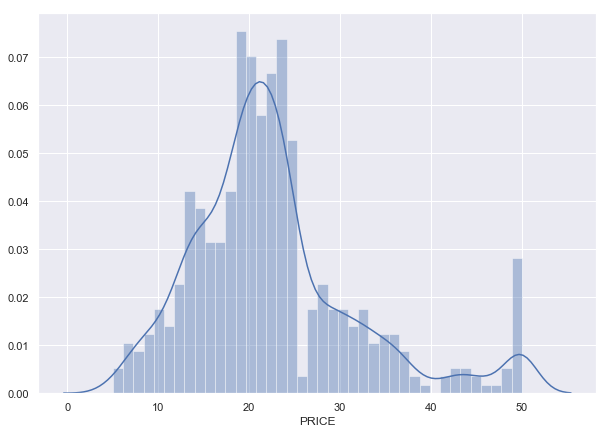

In [48]:
# For this we can use Seaborn:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(boston['PRICE'], bins=40)
plt.show()

*** 
### Inferential statistics & plots
****

**Test 1** - Is there a significant difference in median house prices between houses that are along the Charles river and those that aren’t?

In [6]:
x = boston['CHAS']
x

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
476    0.0
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
500    0.0
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [13]:
# Splitting the CHAS variable into 2: bounds river or does not:

bounds = boston[(boston['CHAS'] == 1.0)] #
no_bounds = boston[(boston['CHAS'] == 0.0)] #

#  Make a new split dataframe of bounds vs no bounds:

dfriver = bounds,no_bounds
dfriver

(        CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
 142  3.32105   0.0  19.58   1.0  0.8710  5.403  100.0  1.3216   5.0  403.0   
 152  1.12658   0.0  19.58   1.0  0.8710  5.012   88.0  1.6102   5.0  403.0   
 154  1.41385   0.0  19.58   1.0  0.8710  6.129   96.0  1.7494   5.0  403.0   
 155  3.53501   0.0  19.58   1.0  0.8710  6.152   82.6  1.7455   5.0  403.0   
 160  1.27346   0.0  19.58   1.0  0.6050  6.250   92.6  1.7984   5.0  403.0   
 162  1.83377   0.0  19.58   1.0  0.6050  7.802   98.2  2.0407   5.0  403.0   
 163  1.51902   0.0  19.58   1.0  0.6050  8.375   93.9  2.1620   5.0  403.0   
 208  0.13587   0.0  10.59   1.0  0.4890  6.064   59.1  4.2392   4.0  277.0   
 209  0.43571   0.0  10.59   1.0  0.4890  5.344  100.0  3.8750   4.0  277.0   
 210  0.17446   0.0  10.59   1.0  0.4890  5.960   92.1  3.8771   4.0  277.0   
 211  0.37578   0.0  10.59   1.0  0.4890  5.404   88.6  3.6650   4.0  277.0   
 212  0.21719   0.0  10.59   1.0  0.4890  5.807   53

In [39]:
# Let's filter all the house prices based on "tract bounds river":

bounds['PRICE']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: PRICE, dtype: float64

In [40]:
# And filter prices based on "tract bounds river":

no_bounds['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 471, dtype: float64

In [34]:
# Output the the median values for both cohorts:

print("Tract bounds river median house price",bounds['PRICE'].median())
print("Tract doesn't bound river median house price",no_bounds['PRICE'].median())

Tract bounds river median house price 23.3
Tract doesn't bound river median house price 20.9


***
Non-parametric median test:

In [17]:
# non-parametric method:
# Kruskal Wallis  H-test tests the null hypothesis that the population median of all of the groups are equal. 
# It is a non-parametric version of ANOVA.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal

from scipy import stats
stats.kruskal(bounds['PRICE'], no_bounds['PRICE'])

KruskalResult(statistic=9.984747790841892, pvalue=0.001578421729426335)

Thus, we can see the p value shows a significant difference in median house prices. In fact, a highly significant one. This means that house which are located where the tract bounds the river are significantly *more* expensive than houses which don't. Interestingly, there are notably less of these expensive houses in the dataset compared to ones less expensive. 

In [38]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import kruskal

# compare samples
stat, p = kruskal(bounds['PRICE'], no_bounds['PRICE'])
print('Statistic =%.4f, \np =%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions, (reject H0)')

Statistic =9.9847, 
p =0.0016
Different distributions, (reject H0)


Parametric median test:

In [20]:
# [6] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html (To be ref'd)
# Use CHAS (as condition/IV)
# PRICE as DV
# Create the 2 groups (g1, g2)

from scipy.stats import median_test
from statistics import median
stat, p, med, tbl = median_test(bounds['PRICE'], no_bounds['PRICE'])

In [21]:
# The grand median

med

21.2

In [22]:
# The contingency table:
# The shape of the table is (2, n), where n is the number of samples. 
# The first row holds the counts of the values above the grand median, 
# and the second row holds the counts of the values below the grand median. 
# The table allows further analysis with, for example, scipy.stats.chi2_contingency

tbl

array([[ 26, 224],
       [  9, 247]], dtype=int64)

In [23]:
# The p value of the median test:

p

0.004026327394058504

In [24]:
# The test statistic: 
# The statistic that is returned is determined by lambda_. 
# The default is Pearson’s chi-squared statistic.

stat

8.271903391340615

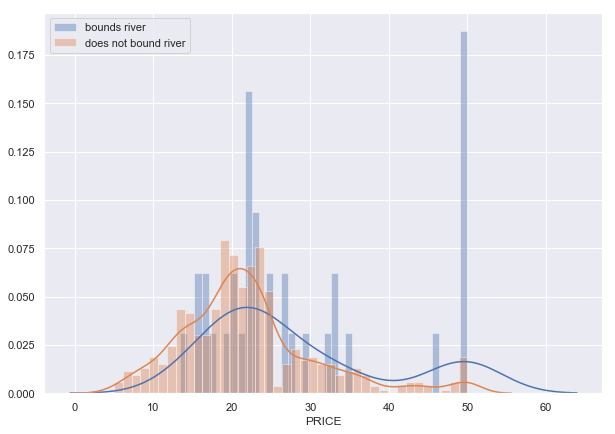

In [68]:
# As before when we plotted the distribution of house prices but this time 
# differenciated by colour:

sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(bounds['PRICE'], bins=40, label='bounds river')
sns.distplot(no_bounds['PRICE'], bins=40, label='does not bound river')
plt.legend()
plt.show()

*** 
### Descriptive & summary statistics
***

***
### Implementing a neural network to predict house prices
***

*** 
### Evaluation & discussion
***

***
### Insights learned & personal reflection
***

***
### References
***

[1]. Scikit-learn developers (2019). *sklearn.datasets.load_boston*. Retrieved 29/09/19 from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

[2]. Multiple authors (2018). *The Boston Housing Dataset*. Retrieved 30/09/19 from: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[3]. Gupta, A. (2019). *Sklearn Linear Regression Tutorial with Boston House Dataset*. Retrieved 30/09/19 from: https://medium.c*.om/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

[4]. DELVE (1996).*The Boston Housing Dataset*. Retrieved 01/10/19 from: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

[5]. Harrison, D. & Rubinfeld, D.L. (1978). "Hedonic prices and the demand for clean air", *J. Environ. Economics & Management,* vol.5, 81-102

[6]. SciPy developers. (2015). *scipy.stats.median_test*.Retrieved 04/10/19 from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html

***
### Appendices
***